<a href="https://colab.research.google.com/github/shrestha1/AT3_MLA/blob/rusan/MLAA_AT3_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')
%cd /content/gdrive/MyDrive

Mounted at /content/gdrive
/content/gdrive/MyDrive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
df = pd.read_csv('data_cleaned_3.csv')

In [ ]:
df.drop('Unnamed: 0', inplace=True, axis=1)

In [ ]:
df.head()

,entertainment,food_dining,gas_transport,grocery_net,grocery_pos,health_fitness,home,kids_pets,misc_net,misc_pos,personal_care,shopping_net,shopping_pos,travel,kmeans_4,kmeans_3,meanshift,aggcluster3
0,10117.78,9411.51,9094.37,16056.04,22502.97,12319.57,18540.93,12379.49,13326.13,12910.52,9308.94,8984.54,18950.22,687.28,1,1,70,1
1,13864.75,13866.55,8374.89,12967.38,30065.98,10203.07,15673.86,13777.83,11050.25,20290.53,13509.64,19698.60,19008.20,1884.09,1,1,1,2
2,5999.48,10654.46,6868.98,10126.65,17648.31,9197.97,10257.21,7398.97,7397.43,11629.76,9412.31,9756.31,11099.09,772.61,2,2,12,1
3,1504.40,1225.15,1263.77,2353.88,3748.32,1993.22,2500.07,5140.84,1752.15,2646.95,1357.40,4217.13,2605.76,294.38,3,0,0,0
4,2467.92,3184.05,1526.71,3468.83,6881.51,1109.39,2470.35,3876.71,2172.44,3057.63,3398.50,4281.31,2955.76,157.70,0,0,0,0


In [ ]:
feat_list = [f for f in df.columns.tolist() if f not in ['kmeans_4', 'kmeans_3', 'meanshift', 'aggcluster3']]
feat_list

['entertainment',
 'food_dining',
 'gas_transport',
 'grocery_net',
 'grocery_pos',
 'health_fitness',
 'home',
 'kids_pets',
 'misc_net',
 'misc_pos',
 'personal_care',
 'shopping_net',
 'shopping_pos',
 'travel']

In [ ]:
df[feat_list].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6630 entries, 0 to 6629
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   entertainment   6630 non-null   float64
 1   food_dining     6630 non-null   float64
 2   gas_transport   6630 non-null   float64
 3   grocery_net     6630 non-null   float64
 4   grocery_pos     6630 non-null   float64
 5   health_fitness  6630 non-null   float64
 6   home            6630 non-null   float64
 7   kids_pets       6630 non-null   float64
 8   misc_net        6630 non-null   float64
 9   misc_pos        6630 non-null   float64
 10  personal_care   6630 non-null   float64
 11  shopping_net    6630 non-null   float64
 12  shopping_pos    6630 non-null   float64
 13  travel          6630 non-null   float64
dtypes: float64(14)
memory usage: 725.3 KB


In [ ]:
df[feat_list].describe()

,entertainment,food_dining,gas_transport,grocery_net,grocery_pos,health_fitness,home,kids_pets,misc_net,misc_pos,personal_care,shopping_net,shopping_pos,travel
count,6630.000000,6630.000000,6630.000000,6630.000000,6630.000000,6630.000000,6630.000000,6630.000000,6630.000000,6630.000000,6630.000000,6630.000000,6630.000000,6630.000000
mean,3083.154822,3134.104834,3824.221231,2318.675703,4819.566801,2551.850066,3878.211554,3551.992149,2319.080367,3216.673569,2892.183342,3183.009062,4275.743551,1288.003917
std,3816.117829,4036.071411,4360.318241,4219.343635,6570.839985,3606.307440,5153.776531,4630.449372,3407.365774,4444.094438,4032.721481,4532.834003,5499.037175,1765.976137
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,204.905000,165.350000,675.712500,100.830000,586.967500,77.127500,178.915000,118.582500,184.590000,311.082500,10.807500,254.060000,406.230000,0.000000
50%,1566.310000,1485.365000,2142.250000,686.975000,2332.245000,1074.400000,1793.530000,1689.130000,1029.230000,1511.870000,1311.145000,1480.285000,2124.405000,588.765000
75%,4726.272500,4750.830000,5651.707500,2362.167500,6529.742500,3547.592500,5656.547500,5321.327500,2976.430000,4372.405000,4153.465000,4165.687500,6242.635000,1973.535000
max,34180.220000,37128.550000,31459.040000,37353.220000,59730.400000,37735.470000,41720.380000,45974.820000,33259.290000,37547.420000,37592.420000,51719.240000,44599.580000,21938.250000


In [ ]:
scaler = StandardScaler()

In [ ]:
X = scaler.fit_transform(df[feat_list])

In [ ]:
pca = PCA()

In [ ]:
pca.fit(X)

PCA()

In [ ]:
pc_list = [f'PC{i}' for i in list(range(1, pca.n_features_ + 1))]
pc_list

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute `n_features_` was deprecated in version 1.2 and will be removed in 1.4. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


['PC1',
 'PC2',
 'PC3',
 'PC4',
 'PC5',
 'PC6',
 'PC7',
 'PC8',
 'PC9',
 'PC10',
 'PC11',
 'PC12',
 'PC13',
 'PC14']

In [ ]:
pc_data = {
    'pc': pc_list,
    'exp_variance': list(pca.explained_variance_ratio_)
}
pc_data

{'pc': ['PC1',
  'PC2',
  'PC3',
  'PC4',
  'PC5',
  'PC6',
  'PC7',
  'PC8',
  'PC9',
  'PC10',
  'PC11',
  'PC12',
  'PC13',
  'PC14'],
 'exp_variance': [0.7290528560261621,
  0.09898457707736384,
  0.04415433640974234,
  0.02954489978583343,
  0.01868107661602968,
  0.015080978596321166,
  0.012500300689775746,
  0.010812065300672101,
  0.008379740930270678,
  0.007832251293799879,
  0.007692730115383177,
  0.007202437286129689,
  0.0057407428141820335,
  0.00434100705833412]}

In [ ]:
pc_df = pd.DataFrame(pc_data)
pc_df['cuml_var'] = pc_df['exp_variance'].cumsum()
pc_df

,pc,exp_variance,cuml_var
0,PC1,0.729053,0.729053
1,PC2,0.098985,0.828037
2,PC3,0.044154,0.872192
3,PC4,0.029545,0.901737
4,PC5,0.018681,0.920418
5,PC6,0.015081,0.935499
6,PC7,0.012500,0.947999
7,PC8,0.010812,0.958811
8,PC9,0.008380,0.967191
9,PC10,0.007832,0.975023


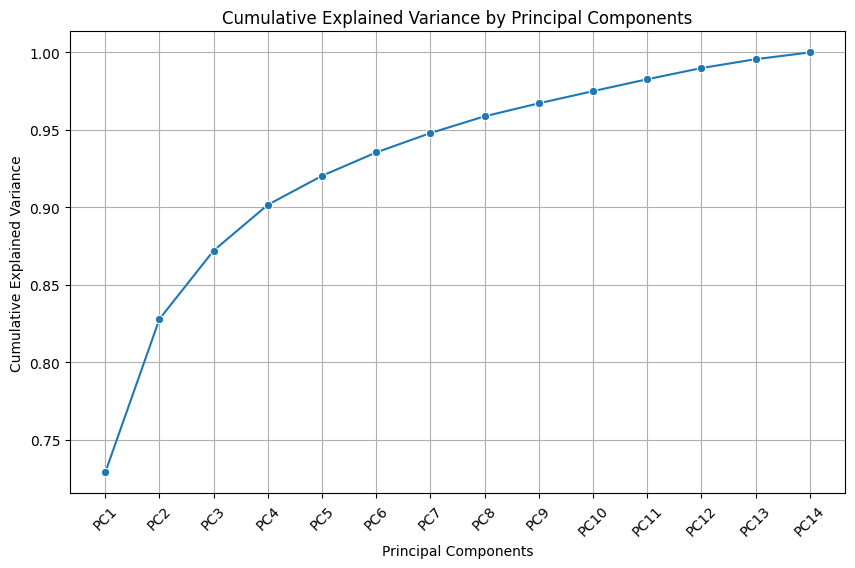

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=pc_df, x='pc', y='cuml_var', marker='o')
plt.title('Cumulative Explained Variance by Principal Components')
plt.xlabel('Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [ ]:
pc_loadings = dict(zip(pc_list, pca.components_))
pc_loadings

{'PC1': array([0.27722324, 0.28405814, 0.19849411, 0.25432746, 0.27720529,
        0.2779502 , 0.2782999 , 0.26833686, 0.27936316, 0.28563219,
        0.25343448, 0.28606159, 0.29236541, 0.20893531]),
 'PC2': array([-0.10553446, -0.13253552,  0.30350861,  0.35706387,  0.30784903,
        -0.15487649, -0.21856876, -0.30874132,  0.28179464,  0.22869568,
        -0.33599246,  0.16748842,  0.02614406, -0.46529209]),
 'PC3': array([ 0.25962175,  0.16399676,  0.81281579, -0.31153426, -0.12376901,
         0.03408727, -0.02958027, -0.09191426, -0.14990157, -0.13010754,
        -0.22597937, -0.11855459, -0.00160251,  0.13285965]),
 'PC4': array([-0.40272176, -0.31003223,  0.28103655,  0.20602487,  0.16223145,
        -0.26533479, -0.1114109 ,  0.03520456,  0.11855101,  0.02753007,
         0.22836719, -0.08402057, -0.21642357,  0.623724  ]),
 'PC5': array([ 0.2848313 ,  0.10254038, -0.29306158, -0.12503493, -0.05442415,
        -0.21836258, -0.34694055, -0.37194207,  0.06528972,  0.16747377,
 

In [ ]:
loadings_df = pd.DataFrame(pc_loadings)
loadings_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
0,0.277223,-0.105534,0.259622,-0.402722,0.284831,0.086084,-0.086452,-0.330634,0.015427,-0.062543,-0.627241,-0.277052,-0.036333,-0.037830
1,0.284058,-0.132536,0.163997,-0.310032,0.102540,-0.078967,-0.048080,-0.446521,0.296305,-0.005926,0.683969,0.045104,-0.007991,-0.050442
2,0.198494,0.303509,0.812816,0.281037,-0.293062,0.133212,0.072111,0.060066,-0.009542,0.093276,0.022825,0.001671,-0.028057,0.079314
3,0.254327,0.357064,-0.311534,0.206025,-0.125035,-0.323825,0.045111,-0.352944,0.276483,0.400620,-0.209328,0.065693,-0.083026,0.359522
4,0.277205,0.307849,-0.123769,0.162231,-0.054424,-0.104223,-0.261306,-0.123504,-0.140104,-0.130331,-0.068936,0.244255,-0.106264,-0.759651
5,0.277950,-0.154876,0.034087,-0.265335,-0.218363,-0.469088,0.640967,0.218960,-0.072458,-0.187988,-0.096820,0.200265,-0.075315,-0.070303
6,0.278300,-0.218569,-0.029580,-0.111411,-0.346941,-0.311166,-0.472963,0.120137,-0.495102,0.181932,0.107416,-0.296053,0.082109,0.148387
7,0.268337,-0.308741,-0.091914,0.035205,-0.371942,0.186458,-0.286137,0.312010,0.643383,-0.161011,-0.157791,0.068686,0.030831,-0.014885
8,0.279363,0.281795,-0.149902,0.118551,0.065290,0.048413,0.136842,0.001049,-0.010339,-0.391322,0.068036,-0.275815,0.735228,0.078659
9,0.285632,0.228696,-0.130108,0.027530,0.167474,0.138125,-0.108126,0.127541,-0.146763,-0.517181,0.117566,-0.003938,-0.562811,0.392089


In [ ]:
loadings_df.insert(0,'feature_names', df[feat_list].columns)
loadings_df

,feature_names,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
0,entertainment,0.277223,-0.105534,0.259622,-0.402722,0.284831,0.086084,-0.086452,-0.330634,0.015427,-0.062543,-0.627241,-0.277052,-0.036333,-0.037830
1,food_dining,0.284058,-0.132536,0.163997,-0.310032,0.102540,-0.078967,-0.048080,-0.446521,0.296305,-0.005926,0.683969,0.045104,-0.007991,-0.050442
2,gas_transport,0.198494,0.303509,0.812816,0.281037,-0.293062,0.133212,0.072111,0.060066,-0.009542,0.093276,0.022825,0.001671,-0.028057,0.079314
3,grocery_net,0.254327,0.357064,-0.311534,0.206025,-0.125035,-0.323825,0.045111,-0.352944,0.276483,0.400620,-0.209328,0.065693,-0.083026,0.359522
4,grocery_pos,0.277205,0.307849,-0.123769,0.162231,-0.054424,-0.104223,-0.261306,-0.123504,-0.140104,-0.130331,-0.068936,0.244255,-0.106264,-0.759651
5,health_fitness,0.277950,-0.154876,0.034087,-0.265335,-0.218363,-0.469088,0.640967,0.218960,-0.072458,-0.187988,-0.096820,0.200265,-0.075315,-0.070303
6,home,0.278300,-0.218569,-0.029580,-0.111411,-0.346941,-0.311166,-0.472963,0.120137,-0.495102,0.181932,0.107416,-0.296053,0.082109,0.148387
7,kids_pets,0.268337,-0.308741,-0.091914,0.035205,-0.371942,0.186458,-0.286137,0.312010,0.643383,-0.161011,-0.157791,0.068686,0.030831,-0.014885
8,misc_net,0.279363,0.281795,-0.149902,0.118551,0.065290,0.048413,0.136842,0.001049,-0.010339,-0.391322,0.068036,-0.275815,0.735228,0.078659
9,misc_pos,0.285632,0.228696,-0.130108,0.027530,0.167474,0.138125,-0.108126,0.127541,-0.146763,-0.517181,0.117566,-0.003938,-0.562811,0.392089


<ipython-input-37-8600c4153f30>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=loadings_df, x='PC1', y='feature_names', palette='Dark2')


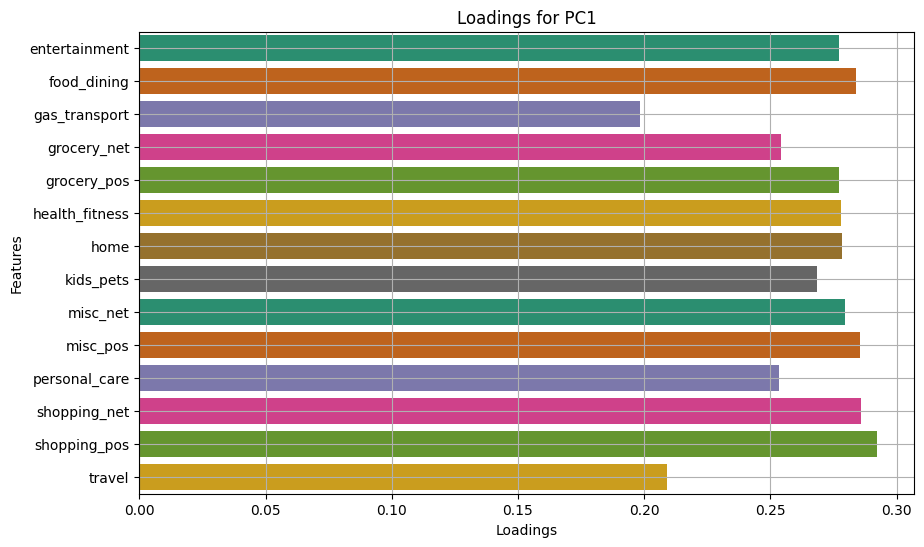

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=loadings_df, x='PC1', y='feature_names', palette='Dark2')
plt.title('Loadings for PC1')
plt.xlabel('Loadings')
plt.ylabel('Features')
plt.grid(True)
plt.show()

<ipython-input-38-1c6cf120ae7c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=loadings_df, x='PC2', y='feature_names', palette='viridis')


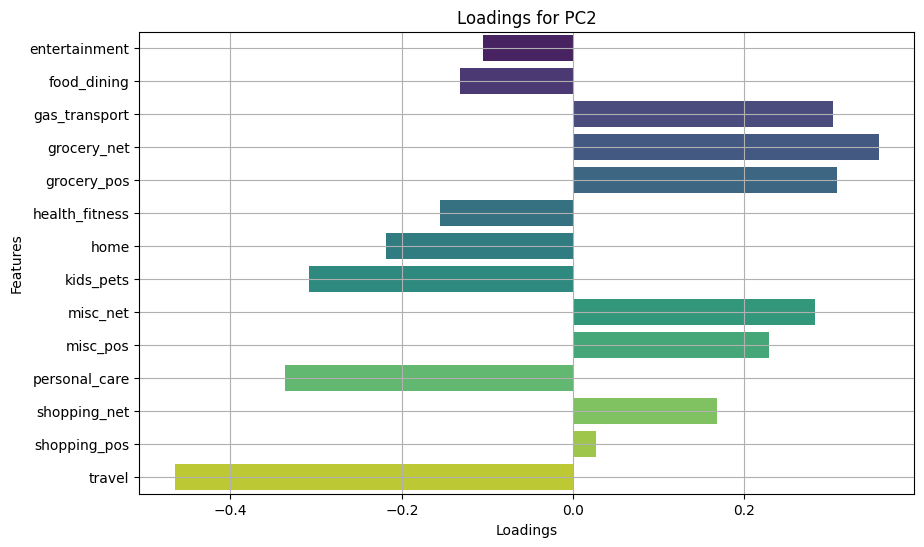

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=loadings_df, x='PC2', y='feature_names', palette='viridis')
plt.title('Loadings for PC2')
plt.xlabel('Loadings')
plt.ylabel('Features')
plt.grid(True)
plt.show()

<ipython-input-39-af65a457eb91>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=loadings_df, x='PC3', y='feature_names', palette='viridis')


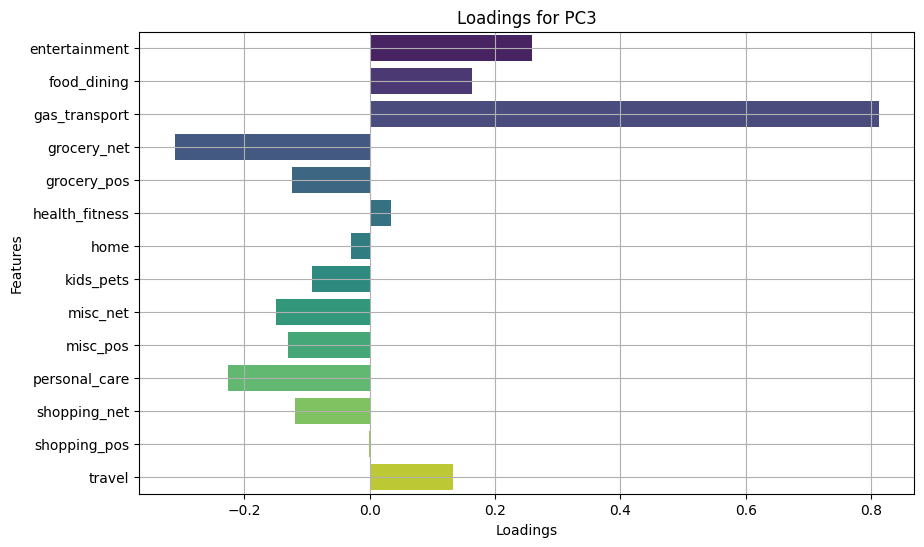

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=loadings_df, x='PC3', y='feature_names', palette='viridis')
plt.title('Loadings for PC3')
plt.xlabel('Loadings')
plt.ylabel('Features')
plt.grid(True)
plt.show()

<ipython-input-40-f76159e7b03c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=loadings_df, x='PC4', y='feature_names', palette='viridis')


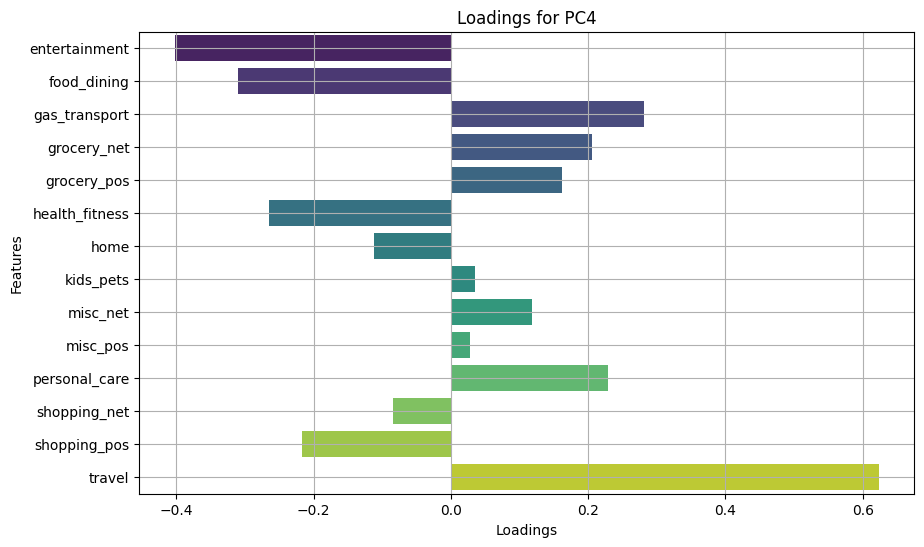

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=loadings_df, x='PC4', y='feature_names', palette='viridis')
plt.title('Loadings for PC4')
plt.xlabel('Loadings')
plt.ylabel('Features')
plt.grid(True)
plt.show()

In [ ]:
pca = PCA(4).fit(X)

In [62]:
pca_df = pd.DataFrame(pca.transform(X))

In [63]:
pca_df.columns = ['PC1', 'PC2', 'PC3', 'PC4']
pca_df

,PC1,PC2,PC3,PC4
0,7.827554,1.644330,-1.127269,-0.836964
1,9.649218,1.478927,-1.312707,-0.930504
2,5.055084,1.054561,-0.844573,-0.563278
3,-0.754762,0.201161,-0.647340,-0.208104
4,-0.282876,0.419041,-0.734568,-0.185939
...,...,...,...,...
6625,-1.829301,0.352241,-0.470623,-0.015362
6626,-2.358259,-0.034114,-0.283304,-0.131758
6627,-2.539868,0.115319,-0.276895,-0.163568
6628,-2.659166,0.093592,-0.362363,-0.167698


In [64]:
cluster_df = pd.DataFrame()
inertia_list = []

In [65]:
cluster_df['nb_cluster'] = range(1, 20)

In [66]:
from sklearn.cluster import KMeans

In [67]:
for k in cluster_df['nb_cluster']:
    kmeans = KMeans(n_clusters=k, random_state=8, n_init=10).fit(pca_df)
    inertia_list.append(kmeans.inertia_)

In [68]:
cluster_df['inertia'] = inertia_list

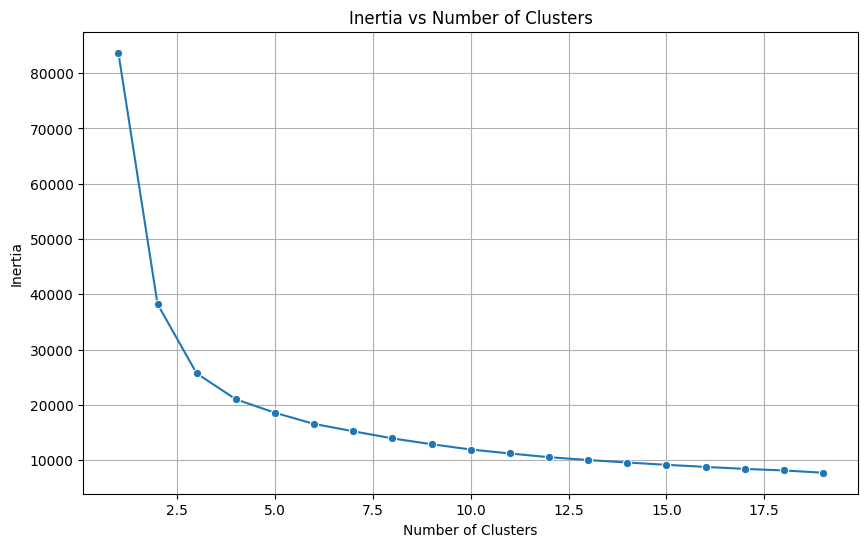

In [69]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='nb_cluster', y='inertia', data=cluster_df, marker='o')
plt.title('Inertia vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

In [89]:
k=3

In [90]:
kmeans = KMeans(random_state=1, n_clusters=k)

In [91]:
kmeans.fit(pca_df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=1)

In [96]:
pca_list = ['PC1', 'PC2', 'PC3', 'PC4']

In [97]:
pca_df['kmeans_pca'] = kmeans.predict(pca_df)

In [98]:
pairs = [(a, b) for idx, a in enumerate(pca_list) for b in pca_list[idx + 1:]]
pairs

[('PC1', 'PC2'),
 ('PC1', 'PC3'),
 ('PC1', 'PC4'),
 ('PC2', 'PC3'),
 ('PC2', 'PC4'),
 ('PC3', 'PC4')]

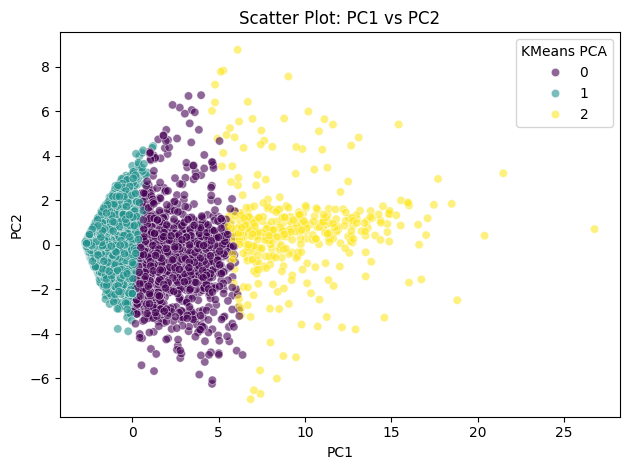

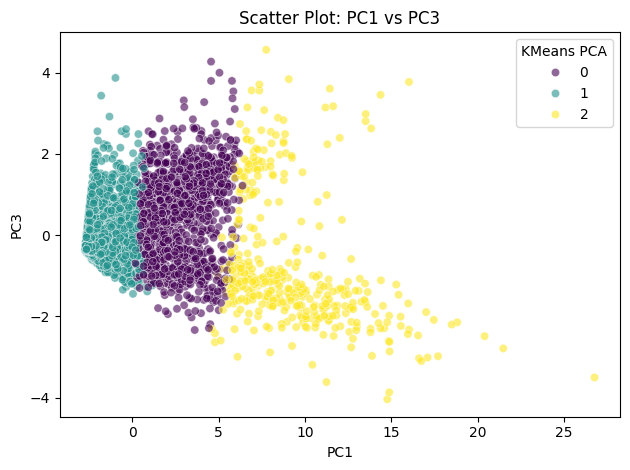

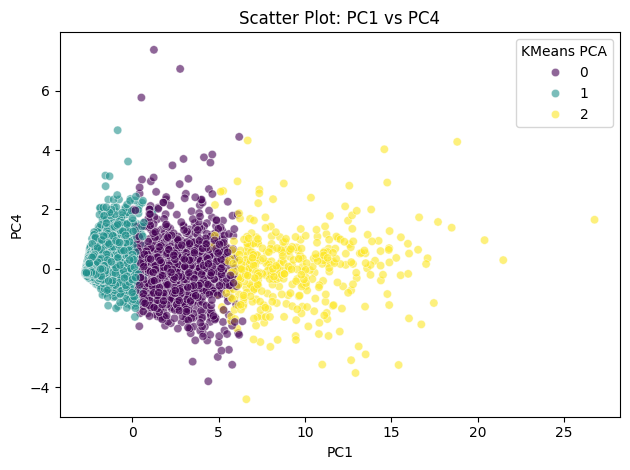

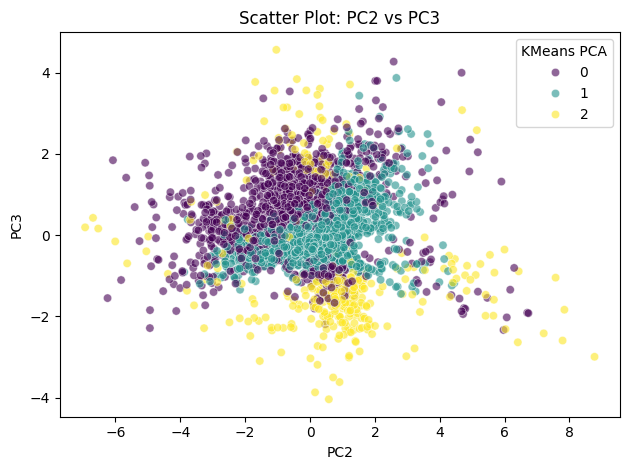

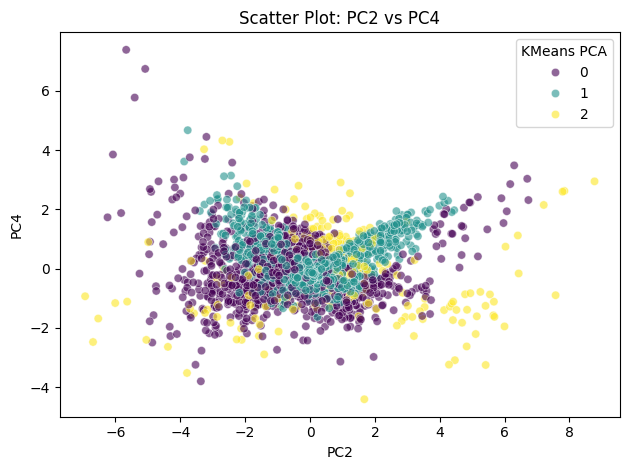

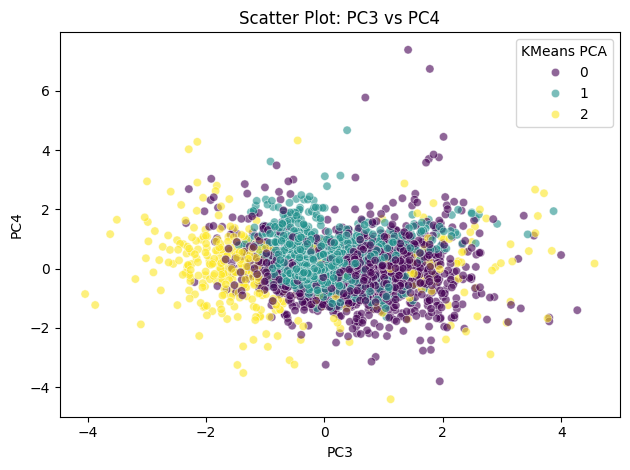

In [101]:
for a, b in pairs:
    plt.figure()
    sns.scatterplot(x=pca_df[a], y=pca_df[b], hue=pca_df['kmeans_pca'], palette='viridis', alpha=0.6)
    plt.title(f'Scatter Plot: {a} vs {b}')
    plt.legend(title='KMeans PCA')
    plt.tight_layout()

In [100]:
from sklearn.metrics import silhouette_score

# Assuming 'labels' contains the cluster labels from KMeans
labels = kmeans.labels_
silhouette_avg = silhouette_score(pca_df, labels)
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.5150476437288202
